In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime

In [2]:
df = pd.read_csv("disney_new", index_col='imdb_id')

In [3]:
df.dtypes

title           object
type             int64
rated           object
year             int64
released_at     object
added_at        object
runtime          int64
genre           object
director        object
writer          object
actors          object
language        object
country         object
awards          object
imdb_rating    float64
imdb_votes     float64
dtype: object

In [4]:
df["added_at"] = pd.to_datetime(df["added_at"])

In [5]:
df['released_at'] = pd.to_datetime(df['released_at'])

1. Фильмы в жанре анимация более популярны, поэтому у сериалов и меньше общий
рейтинг, потому как анимационных сериалов меньше.
2. Фильмы, добавленные на платформу гораздо позже их создания, имеют меньший
рейтинг.
3. Контент с одним из жанров Family имеет высокие оценки.
4. Чем больше фильмов или сериалов снял определенный режиссер, тем популярнее
контент.
5. Зависимость рейтинга от количества проголосовавших - экспоненциальная.

In [6]:
df.shape

(838, 16)

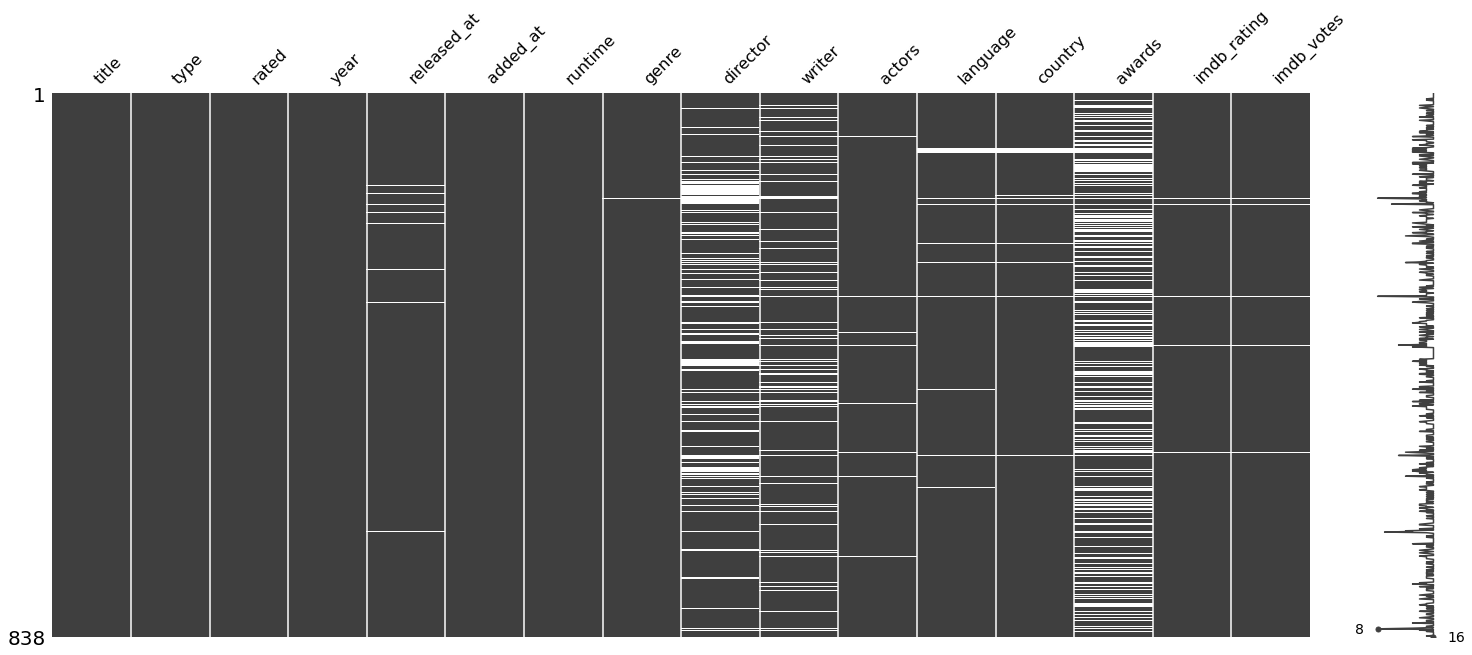

In [7]:
msno.matrix(df)

В столбцах title, type, rated, year, addet_at, runtime пропусков нет. В столбцах released_at, genre, actors, language, country, imdb_rating, imdb_votes пропусков сравнительно немного, так что обработать их будет проще. Числа 8 и 16 показывают, что минимальное количество заполненных ячеек в строке - 8, а максимальное количество - 16.

Можно посмотреть на ситуацию в числах.

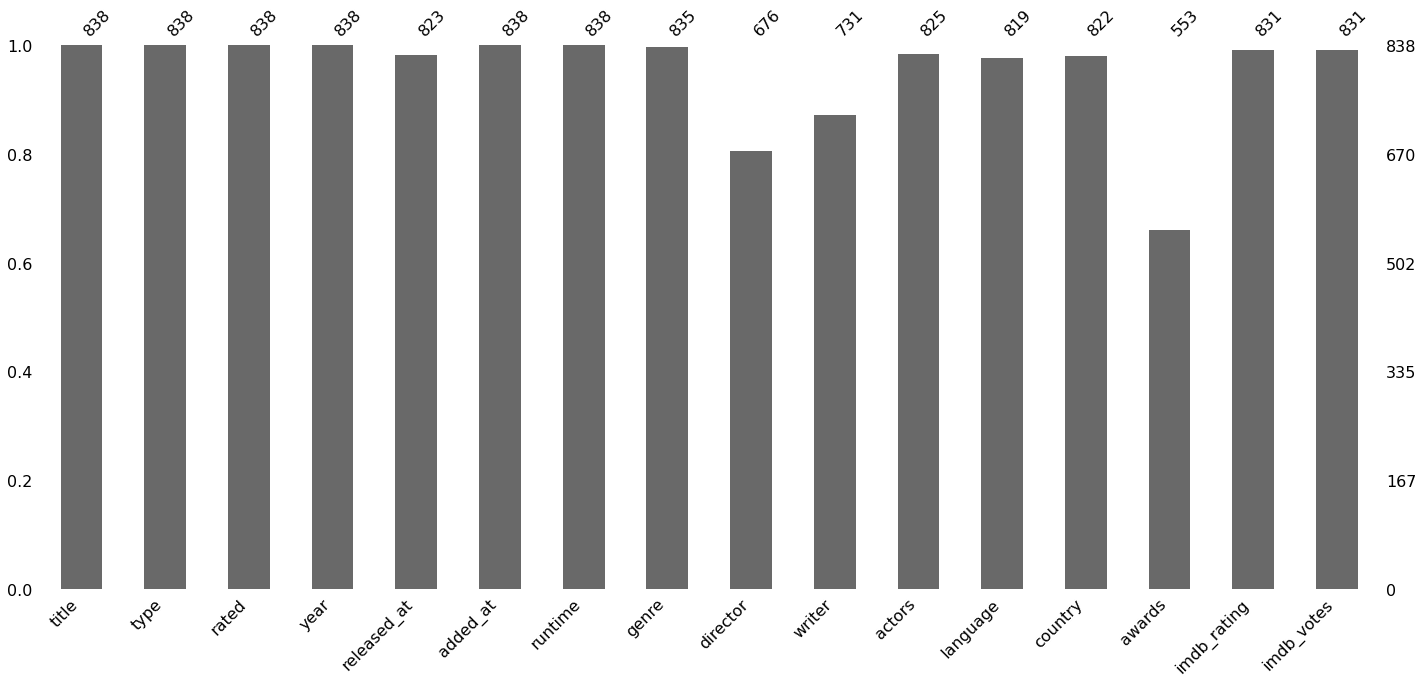

In [8]:
msno.bar(df)

Также высказывалось предположение, что часть столбцов сильно коррелирую друг с другом. Для оценки того, как сильно отсутствие одного значения влияет на остальные, можно построить корреляционную матрицу пустот.

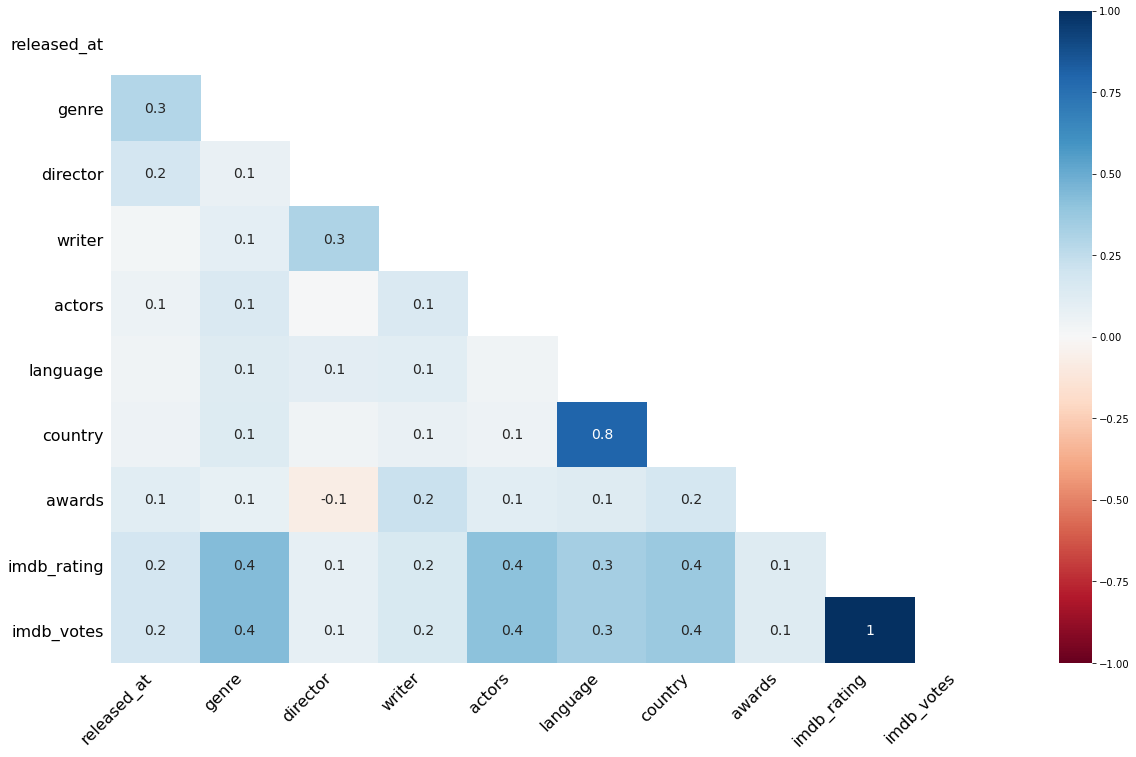

In [9]:
msno.heatmap(df)

Только 1 раз встречается коэффициент корреляции равный 1, следовательно, один из пары столбцов можно удалить, разумеется тот, где данных меньше.

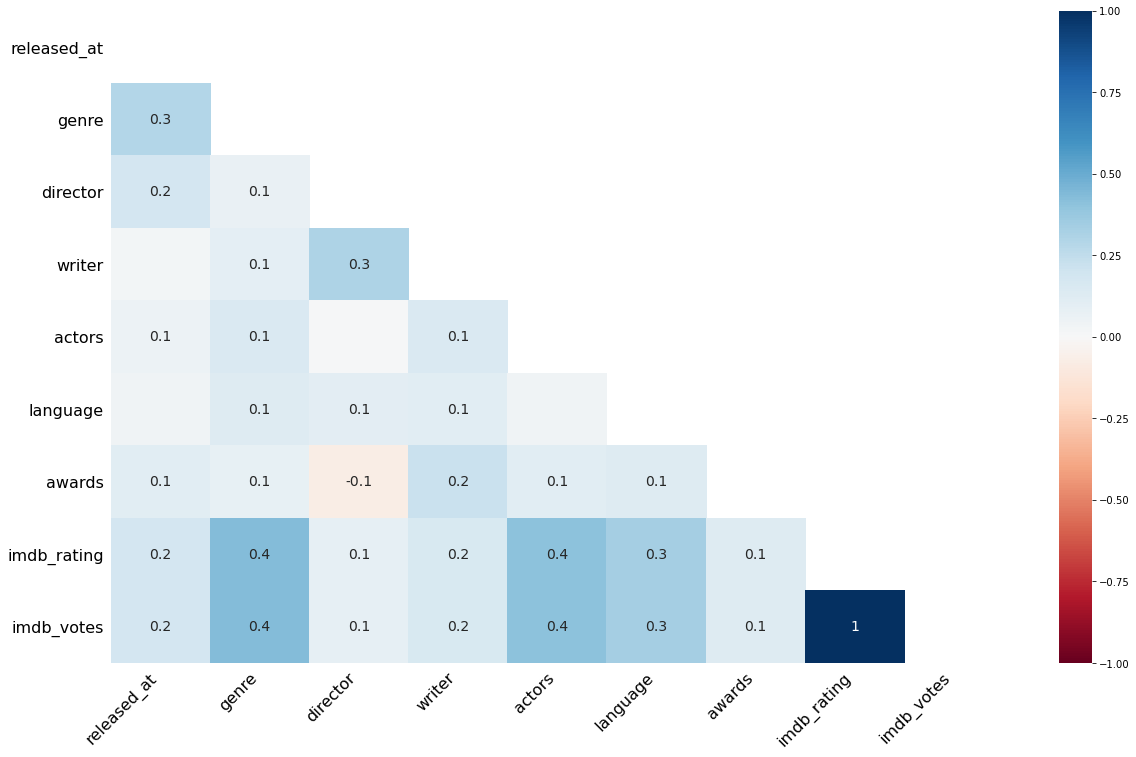

In [10]:
df = df.drop(columns=["country"])
msno.heatmap(df);

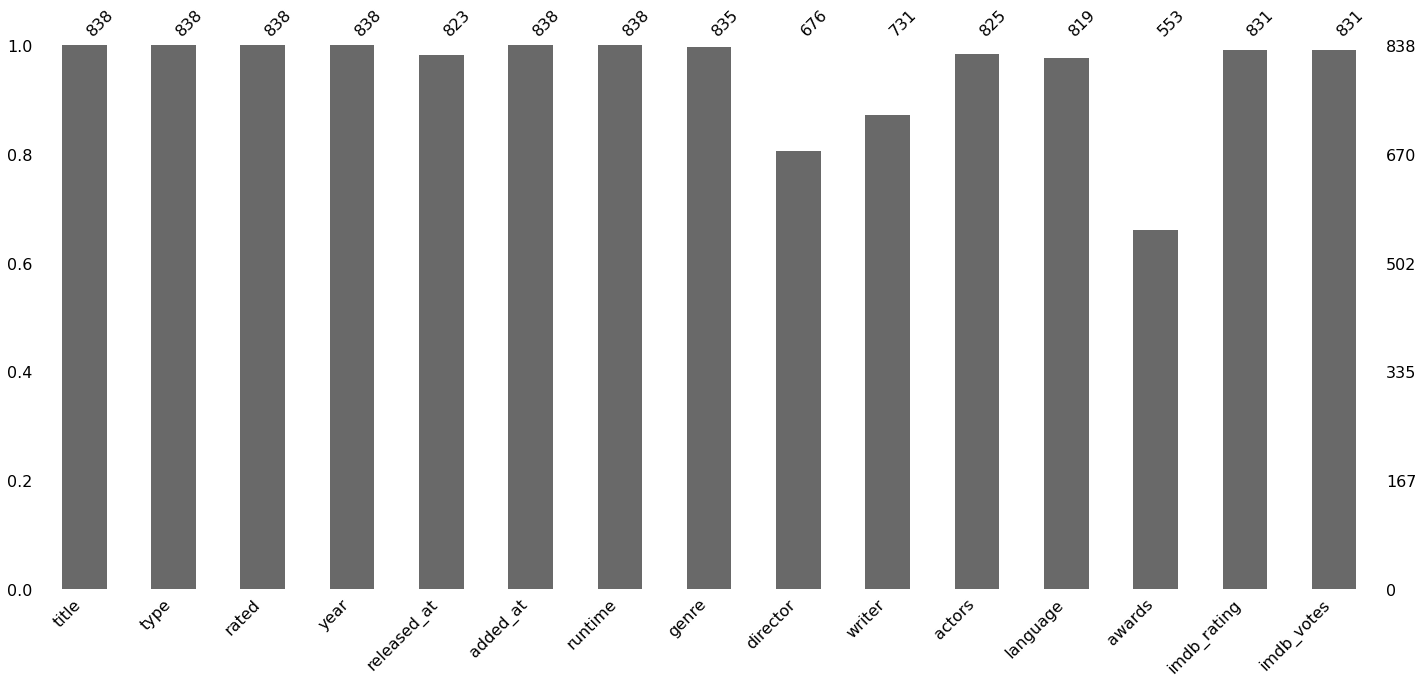

In [11]:
msno.bar(df)

In [12]:
df_1 = df.copy()

In [13]:
df_1["dif"] = df["added_at"] - df["released_at"]

In [14]:
df_imdb = df_1[["imdb_rating", "imdb_votes"]]

In [15]:
df_imdb.head()

imdb_rating  imdb_votes
imdb_id                           
tt0147800          7.3    283945.0
tt0115433          5.7     97785.0
tt0324941          5.8      7434.0
tt0211181          4.9     33444.0
tt1846442          6.3      4933.0

In [16]:
imdb = df_imdb.groupby('imdb_rating', as_index=False).sum()

In [17]:
imdb.head()

imdb_rating  imdb_votes
0          1.5     17198.0
1          2.3      8392.0
2          3.0     22405.0
3          3.3      6039.0
4          3.4      5423.0

In [18]:
imdb = imdb.sort_values(by=["imdb_rating"], ascending=False).reset_index(drop=True)

## Гипотеза 1. Зависимость рейтинга от количества проголосовавших - экспоненциальная.

In [19]:
import plotly.express as px

In [20]:
fig = px.line(imdb, y="imdb_votes", x="imdb_rating", title="Рост рейтинга от количества проголосовавших")
fig.show()

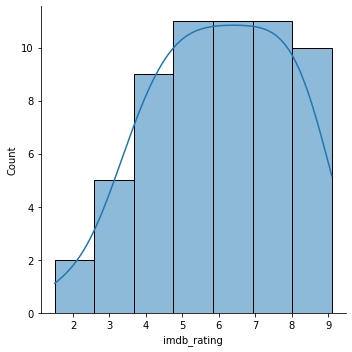

In [21]:
sns.displot(imdb, x="imdb_rating", kde=True)

In [22]:
m_imdb = df_1[["imdb_votes", "imdb_rating"]].loc[df_1["type"] == 0].reset_index(drop=True).reset_index()
s_imdb = df_1[["imdb_votes", "imdb_rating"]].loc[df_1["type"] == 1].reset_index(drop=True).reset_index()

In [23]:
m_imdb = m_imdb.groupby('imdb_rating', as_index=False).sum()
s_imdb = s_imdb.groupby('imdb_rating', as_index=False).sum()

In [24]:
import plotly.graph_objects as go
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(x=m_imdb["imdb_rating"], y=m_imdb["imdb_votes"], fill="tozeroy"))
fig_1.add_trace(go.Scatter(x=s_imdb["imdb_rating"], y=s_imdb["imdb_votes"], fill="tonexty"))
fig_1.show()

In [25]:
imdb_v = [0]*10

In [26]:
imdb_v[0] = df.loc[(df['imdb_rating'] >= 0) & (df['imdb_rating'] <= 1), 'imdb_votes'].sum()
imdb_v[1] = df.loc[(df['imdb_rating'] > 1) & (df['imdb_rating'] <= 2), 'imdb_votes'].sum()
imdb_v[2] = df.loc[(df['imdb_rating'] > 2) & (df['imdb_rating'] <= 3), 'imdb_votes'].sum()
imdb_v[3] = df.loc[(df['imdb_rating'] > 3) & (df['imdb_rating'] <= 4), 'imdb_votes'].sum()
imdb_v[4] = df.loc[(df['imdb_rating'] > 4) & (df['imdb_rating'] <= 5), 'imdb_votes'].sum()
imdb_v[5] = df.loc[(df['imdb_rating'] > 5) & (df['imdb_rating'] <= 6), 'imdb_votes'].sum()
imdb_v[6] = df.loc[(df['imdb_rating'] > 6) & (df['imdb_rating'] <= 7), 'imdb_votes'].sum()
imdb_v[7] = df.loc[(df['imdb_rating'] > 7) & (df['imdb_rating'] <= 8), 'imdb_votes'].sum()
imdb_v[8] = df.loc[(df['imdb_rating'] > 8) & (df['imdb_rating'] <= 9), 'imdb_votes'].sum()
imdb_v[9] = df.loc[(df['imdb_rating'] > 9) & (df['imdb_rating'] <= 10), 'imdb_votes'].sum()

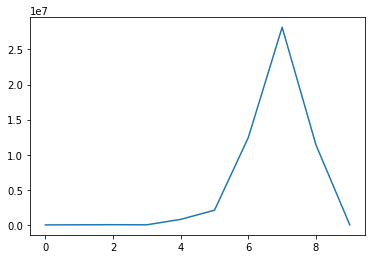

In [27]:
x = np.arange(0,10,1)
y = imdb_v
plt.plot(x,y)
plt.show()

In [28]:
imdb_v

[0.0,
 17198.0,
 30797.0,
 16279.0,
 789607.0,
 2098054.0,
 12456717.0,
 28159142.0,
 11402530.0,
 1194.0]

## Гипотеза 2. Фильмы в жанре анимация более популярны, поэтому у сериалов и меньше общий рейтинг, потому как анимационных сериалов меньше.

In [29]:
m_df = df_1.loc[df_1["type"] == 0]
s_df = df_1.loc[df_1["type"] == 1]
s_df_num = s_df.shape[0]
m_df_num = m_df.shape[0]

In [32]:
df_1 = df_1.fillna({'genre':"Unknown",'director':"Unknown", 'writer':"Unknown"})

In [33]:
df_animation = df_1[df_1['genre'].str.contains('Animation')]

In [34]:
series_df = df_animation.loc[df_animation["type"] == 1]  #датафрейм с сериалами
s_num = series_df.shape[0]

In [35]:
movie_df = df_animation.loc[df_animation["type"] == 0]  #датафрейм с сериалами
m_num = movie_df.shape[0]

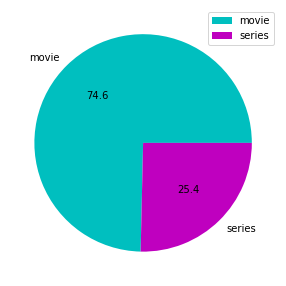

In [36]:
type_pie = pd.DataFrame({"": [m_num, s_num]},
                       index=["movie", "series"])
type_pie.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [37]:
df_animation.loc[df_animation['type'] == 0, 'imdb_rating'].mean()

6.9437984496124034

In [38]:
df_animation.loc[df_animation['type'] == 1, 'imdb_rating'].mean()

6.860227272727273

In [39]:
df_2 = df_1.copy()

In [40]:
df_not_animation = df_2[np.logical_not(df["genre"].str.contains('Animation'))]

In [41]:
df_not_animation.loc[df_not_animation['type'] == 0, 'imdb_rating'].mean()

6.337406483790524

In [42]:
df_not_animation.loc[df_not_animation['type'] == 1, 'imdb_rating'].mean()

6.8307692307692305

In [43]:
series_df_not = df_not_animation.loc[df_not_animation["type"] == 1]
movie_df_not = df_not_animation.loc[df_not_animation["type"] == 0]
s_not_num = series_df_not.shape[0]
m_not_num = movie_df_not.shape[0]

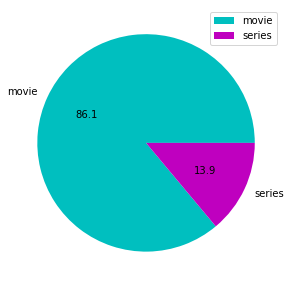

In [44]:
type_pie_2 = pd.DataFrame({"": [m_not_num, s_not_num]},
                       index=["movie", "series"])
type_pie_2.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

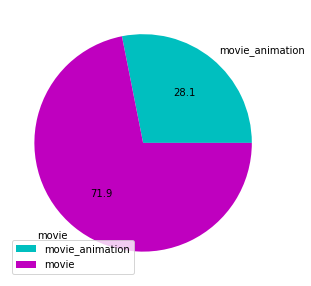

In [45]:
type_pie_3 = pd.DataFrame({"": [m_num, m_df_num]},
                       index=["movie_animation", "movie"])
type_pie_3.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

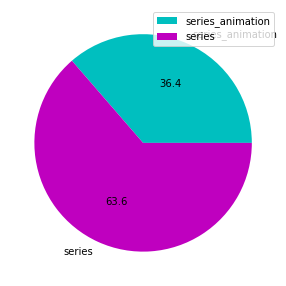

In [46]:
type_pie_4 = pd.DataFrame({"": [s_num, s_df_num]},
                       index=["series_animation", "series"])
type_pie_4.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [47]:
movie_df_1 = movie_df[["imdb_votes", "imdb_rating"]].reset_index(drop=True).reset_index()
series_df_1 = series_df[["imdb_votes", "imdb_rating"]].reset_index(drop=True).reset_index()
movie_df_not_1 = movie_df_not[["imdb_votes", "imdb_rating"]].reset_index(drop=True).reset_index()
series_df_not_1 = series_df_not[["imdb_votes", "imdb_rating"]].reset_index(drop=True).reset_index()

movie_df_1 = movie_df_1.groupby('imdb_rating', as_index=False).sum()
series_df_1 = series_df_1.groupby('imdb_rating', as_index=False).sum()
movie_df_not_1 = movie_df_not_1.groupby('imdb_rating', as_index=False).sum()
series_df_not_1 = series_df_not_1.groupby('imdb_rating', as_index=False).sum()

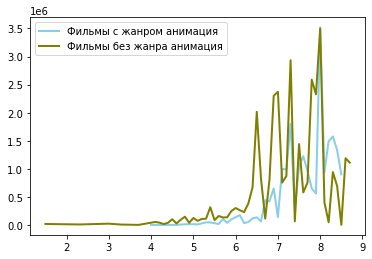

In [48]:
plt.plot('imdb_rating', 'imdb_votes', data=movie_df_1, marker='', color='skyblue', linewidth=2, label="Фильмы с жанром анимация")
plt.plot('imdb_rating', 'imdb_votes', data=movie_df_not_1, marker='', color='olive', linewidth=2, label="Фильмы без жанра анимация")

# show legend
plt.legend()
# show graph
plt.show()

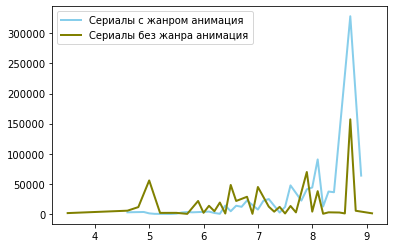

In [49]:
plt.plot('imdb_rating', 'imdb_votes', data=series_df_1, marker='', color='skyblue', linewidth=2, label="Сериалы с жанром анимация")
plt.plot('imdb_rating', 'imdb_votes', data=series_df_not_1, marker='', color='olive', linewidth=2, label="Сериалы без жанра анимация")
# show legend
plt.legend()

# show graph
plt.show()

## Гипотеза 3. Фильмы, добавленные на платформу гораздо позже их создания, имеют меньший рейтинг.

In [50]:
df_2["dif"] = df_2["added_at"] - df_2["released_at"]
df_2["dif"]= df_2["dif"].dt.days
dif_imdb = df_2[["imdb_rating", "dif"]]
dif_imdb = dif_imdb.sort_values(by=["dif"], ascending=False).reset_index(drop=True)
#df_2[["imdb_rating", "dif"]]

In [51]:
fig_3 = px.line(dif_imdb, y="imdb_rating", x="dif", title="Рост рейтинга от разницы между датой выпуска и датой загрузки на платформу")
fig_3.show()

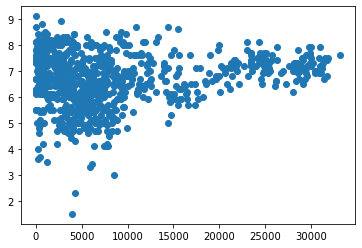

In [52]:
plt.plot('dif', 'imdb_rating', data=dif_imdb, linestyle='none', marker='o')
plt.show()

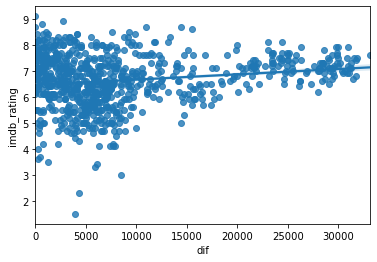

In [53]:
sns.regplot(x=dif_imdb["dif"], y=dif_imdb["imdb_rating"])

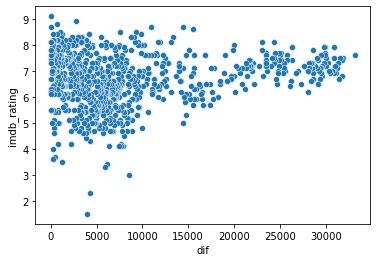

In [54]:
sns.scatterplot(data=dif_imdb, x="dif", y="imdb_rating");

Гипотеза не подтвердилась. Да, самый высокий рейтинг у тех фильмов, что выпущены недавно, но у более старых фильмов рейтинг не сильно упал.

# Гипотеза 4. Контент с одним из жанров Family имеет высокие оценки.

In [55]:
df_family = df_2[df_2['genre'].str.contains('Family')]

In [56]:
df_family_imdb = df_family[["imdb_rating"]]

In [57]:
df_family_imdb.head()

imdb_rating
imdb_id               
tt0115433          5.7
tt0324941          5.8
tt0211181          4.9
tt0046672          7.2
tt0120623          7.2

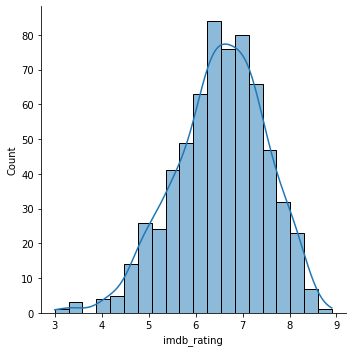

In [58]:
sns.displot(df_family_imdb, x="imdb_rating", kde=True)

In [59]:
df_not_family = df_2[np.logical_not(df_2["genre"].str.contains('Family'))]

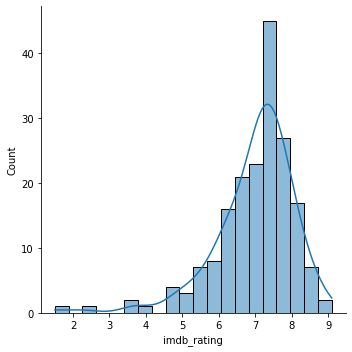

In [60]:
sns.displot(df_not_family, x="imdb_rating", kde=True)

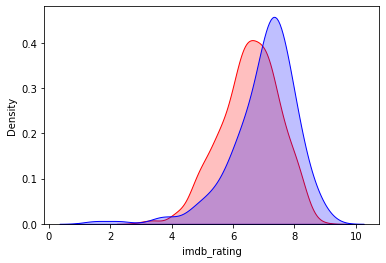

In [61]:
fig_4 = sns.kdeplot(df_family_imdb['imdb_rating'], shade=True, color="r")
fig_4 = sns.kdeplot(df_not_family['imdb_rating'], shade=True, color="b")
plt.show()

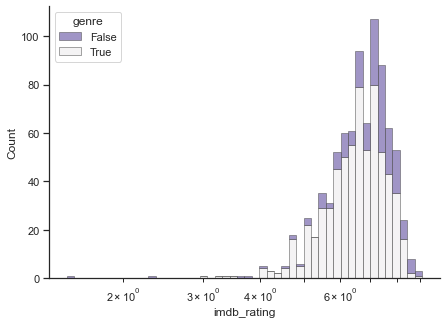

In [62]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df_2,
    x="imdb_rating", hue=df_2["genre"].str.contains('Family'),
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
df_family.groupby('imdb_rating').count()

title  type  rated  year  released_at  added_at  runtime  genre  \
imdb_rating                                                                    
3.0              1     1      1     1            1         1        1      1   
3.3              1     1      1     1            1         1        1      1   
3.4              1     1      1     1            1         1        1      1   
3.5              1     1      1     1            1         1        1      1   
4.1              4     4      4     4            4         4        4      4   
4.2              3     3      3     3            3         3        3      3   
4.3              1     1      1     1            1         1        1      1   
4.4              1     1      1     1            1         1        1      1   
4.5              1     1      1     1            1         1        1      1   
4.6              3     3      3     3            3         3        3      3   
4.7             10    10     10    10           10        10       10     10   
4.8              6     6      6     6            6         6        6      6   
4.9              5     5      5     5            5         5        5      5   
5.0             15    15     15    15           15        15       15     15   
5.1              7     7      7     7            7         7        7      7   
5.2              7     7      7     7            7         7        7      7   
5.3             10    10     10    10           10        10       10     10   
5.4             15    15     15    15           15        15       15     15   
5.5             14    14     14    14           14        14       14     14   
5.6             12    12     12    12           11        12       12     12   
5.7             17    17     17    17           16        17       17     17   
5.8             11    11     11    11           11        11       11     11   
5.9             21    21     21    21           21        21       21     21   
6.0             13    13     13    13           12        13       13     13   
6.1             26    26     26    26           25        26       26     26   
6.2             24    24     24    24           24        24       24     24   
6.3             24    24     24    24           24        24       24     24   
6.4             31    31     31    31           30        31       31     31   
6.5             29    29     29    29           28        29       29     29   
6.6             24    24     24    24           23        24       24     24   
6.7             26    26     26    26           26        26       26     26   
6.8             26    26     26    26           25        26       26     26   
6.9             27    27     27    27           27        27       27     27   
7.0             22    22     22    22           22        22       22     22   
7.1             31    31     31    31           31        31       31     31   
7.2             27    27     27    27           27        27       27     27   
7.3             21    21     21    21           21        21       21     21   
7.4             18    18     18    18           18        18       18     18   
7.5             13    13     13    13           13        13       13     13   
7.6             22    22     22    22           22        22       22     22   
7.7             12    12     12    12           12        12       12     12   
7.8              9     9      9     9            9         9        9      9   
7.9              9     9      9     9            9         9        9      9   
8.0             14    14     14    14           12        14       14     14   
8.1             12    12     12    12           12        12       12     12   
8.2              6     6      6     6            6         6        6      6   
8.3              5     5      5     5            5         5        5      5   
8.4              5     5      5     5            5         5        5      5   
8.5          

## Гипотеза 5. Чем больше фильмов или сериалов снял определенный режиссер, тем популярнее контент.

In [64]:
def rating_of_movies_directed_by_famous_directors(data_frame: pd.DataFrame, min_movie_amount=5):
    """
    Фильмы, режисёры которых сняли более min_movie_amount фильмов. Ну и рейтинг для каждого из них.
    """
    # получаем словарь с режисёроми и рейтингами фильмов
    director_ratings = director_with_ratings(data_frame)
    # Убираем тех, кто снял меньше чем min_movie_amount фильмов
    filtered_director_ratings = filter_directors_by_the_amount_of_movies_shot(director_ratings, min_movie_amount)

    movies_rating = {}

    # список всех режисёров снявших больше min_movie_amount фильмов
    directors = filtered_director_ratings.keys()

    for index, row in data_frame.iterrows():
        # для каждого фильма проверяем есть ли в режисёрах хоть один из нашего списка не в качестве со-режисёра
        if any(director_in_movie(director, row['director']) for director in directors):
            movies_rating[row['title']] = row['imdb_rating']

    return movies_rating

In [65]:
def director_in_movie(target_director, directors_from_data_frame):
    if is_co_director(target_director):
        return False
    else:
        return target_director in directors_from_data_frame

In [66]:
def average_movie_rating_of_famous_directors(data_frame, min_movie_amount=5):
    """
    Расчёт среднего по всем фильмам
    """
    # получаем словарь с режисёроми и рейтингами фиьмов
    director_ratings = director_with_ratings(data_frame)
    # Убираем тех, кто снял меньше чем min_movie_amount фильмов
    filtered_director_ratings = filter_directors_by_the_amount_of_movies_shot(director_ratings, min_movie_amount)

    # считаем среднее по всем фильмам
    sum_rating = 0
    count = 0
    for ratings in filtered_director_ratings.values():
        sum_rating += sum(ratings)
        count += len(ratings)
    return sum_rating / count

In [67]:
def average_movie_rating_for_each_famous_director(data_frame, min_movie_amount=5):
    """
    Получение среднего рейтинга режисёров, снявших более min_movie_amount фильмов
    """

    # получаем словарь с режисёроми и рейтингами фиьмов
    director_ratings = director_with_ratings(data_frame)
    # Убираем тех, кто снял меньше чем min_movie_amount фильмов
    filtered_director_ratings = filter_directors_by_the_amount_of_movies_shot(director_ratings, min_movie_amount)
    # Заводим словарь для режисёров со средним рейтингом за фильмы
    directors_avg_rating = {}

    # для каждого режисёра ищем средний рейтинг
    for director in filtered_director_ratings:
        avg_rating = sum(filtered_director_ratings[director]) / len(filtered_director_ratings[director])
        directors_avg_rating[director] = avg_rating

    return directors_avg_rating

In [68]:
def director_with_ratings(data_frame: pd.DataFrame):
    """
    Поиск всеж режисёров и рейтингов снятых ими фильмов
    :return dict: key -> режисёр, value -> список рейтингов
    Пример: {'John Lasseter': [5.7, 7.9, 3.4], 'Jack Hannah': [1.3, 9.9, 8.1, 5.0]}
    """
    director_ratings = {}

    # проходим по всем фильмам
    for index, row in data_frame.iterrows():

        # получаем список режиссёров, записанных изначально через запятую
        director_list = row['director'].split(', ')
        rating = row['imdb_rating']

        # если рейтнг nan игнорим фильм
        if pd.isna(rating):
            continue

        # Добавлем каждого режисёра в список
        for director in director_list:
            if is_valid(director):  # если он коректный конечно
                if director not in director_ratings:
                    director_ratings[director] = [rating]
                else:
                    director_ratings[director].append(rating)

    return director_ratings

In [69]:
def filter_directors_by_the_amount_of_movies_shot(director_ratings: dict, min_movie_amount):
    return dict(filter(lambda x: len(x[1]) > min_movie_amount, director_ratings.items()))


def is_valid(director):
    """
    Проверяем что режисёр не Unknown и не со-режисёр
    """
    return not is_unknown(director) and not is_co_director(director)


def is_unknown(director):
    return 'Unknown' == director


def is_co_director(director: str):
    return '(co-director)' in director

In [70]:
if __name__ == '__main__':
    df = pd.read_csv('disney_new_2.csv')
    p = average_movie_rating_for_each_famous_director(df, 5)
    d = average_movie_rating_of_famous_directors(df, 5)
    k = rating_of_movies_directed_by_famous_directors(df, 5)
    print(p)
    print(d)
    print(k)

{'John Lasseter': 6.816666666666666, 'Jack Hannah': 7.3687499999999995, 'Ron Clements': 7.1875, 'John Musker': 7.1875, 'Clyde Geronimi': 7.088235294117646, 'Wilfred Jackson': 7.242857142857143, 'Hamilton Luske': 7.083333333333335, 'Vincent McEveety': 5.92, 'James Algar': 7.5076923076923086, 'David Hand': 7.442857142857143, 'Bill Roberts': 7.025, 'Robert Stevenson': 6.781818181818181, 'Ben Sharpsteen': 7.470000000000001, 'Paul Hoen': 5.933333333333334, 'Norman Tokar': 6.557142857142857, 'Kenny Ortega': 5.966666666666666, 'Stuart Gillard': 5.9125000000000005, 'Duwayne Dunham': 6.2375, 'Jack Kinney': 6.993333333333333, 'Bradley Raymond': 6.183333333333334, 'Wolfgang Reitherman': 7.300000000000001}
6.8704347826086964
{"A Bug's Life": 7.2, 'A Knight for a Day': 7.0, 'Aladdin': 8.0, 'Alice in Wonderland': 7.4, 'All in a Nutshell': 7.6, 'Amy': 6.6, 'Bambi': 7.3, 'Beach Picnic': 6.7, 'Bearly Asleep': 7.6, 'Bedknobs and Broomsticks': 7.1, 'Beezy Bear': 7.4, "Blackbeard's Ghost": 6.9, 'Boat Buil

In [75]:
director_df = pd.DataFrame.from_dict(data=p, orient='index', columns=["average raiting"])

In [78]:
director_df = director_df.reset_index()

In [80]:
director_df = director_df.rename(columns={'index': 'director'})

In [81]:
director_df.head()

director  average raiting
0   John Lasseter         6.816667
1     Jack Hannah         7.368750
2    Ron Clements         7.187500
3     John Musker         7.187500
4  Clyde Geronimi         7.088235

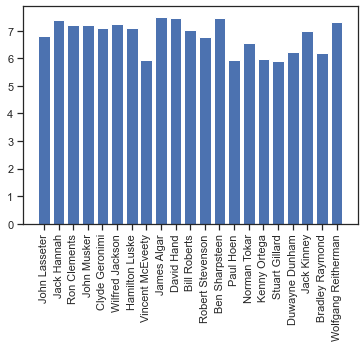

In [83]:
# Create bars
plt.bar(director_df["director"], director_df["average raiting"])
 
# Rotation of the bar names
plt.xticks(director_df["director"], rotation=90)
 
# Custom the subplot layout
#plt.subplots_adjust(bottom=0.4, top=0.99)
 
# Show graphic
plt.show()